In [168]:
import cv2 
import numpy  #Numerical operation
import numpy as np
import collections 
import pandas as pd
import math    
import plotly.express as px   
from matplotlib import cm 
from matplotlib import colors
import imutils 
import imageio  #easy interface to read and write a wide range of image data
import gari    #Genetic algorithm
import matplotlib #Image Visulation
import matplotlib.pyplot as plt
import pygad #using the genetic algorithm by customizing the fitness function.
from matplotlib.pyplot import imread 
from mpl_toolkits.mplot3d import Axes3D 
import scipy.ndimage as ndimage 
from PIL import Image
#import extcolors
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb
from intersect import intersection
import sys
import math

In [284]:
def nothing(x):
    pass

# Load in image
image = cv2.imread("C:\\Users\\bhand\\wound images\\12.jpg")
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Create a window
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
#cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

output = image
wait_time = 1

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')
    
        # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    
    
    output = cv2.bitwise_and(image,image, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        #print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax
        
    

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    
    if cv2.waitKey(10) & 0xFF == 27:
        
        break

cv2.destroyAllWindows()
    

In [285]:
print(phMin ,psMin,pvMin ,  phMax ,  psMax ,pvMax ) 

0 92 61 8 255 255


In [286]:
width=original_image.shape[1]
width

1300

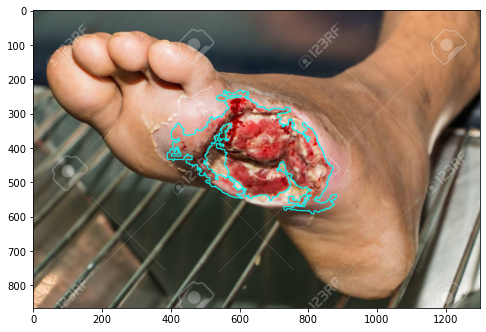

In [287]:
ret, thresh = cv2.threshold(mask, 120, 255, 0)
thresh = cv2.dilate(thresh, None, iterations=2)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
c = max(contours, key=cv2.contourArea)

cv2.drawContours(original_image, [c], -1, (0, 255, 255), 2)
plt.figure( figsize=(8, 6))
plt.imshow(original_image)

In [288]:
rows =c.shape[0]
columns = c.shape[2]

In [289]:
ellipse = cv2.fitEllipse(c)

In [290]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

'''
cv2.circle(original_image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(original_image, extRight, 8, (0, 255, 0), -1)
cv2.circle(original_image, extTop, 8, (255, 0, 0), -1)
cv2.circle(original_image, extBot, 8, (255, 255, 0), -1)

# show the output image
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(original_image)
'''

'\ncv2.circle(original_image, extLeft, 8, (0, 0, 255), -1)\ncv2.circle(original_image, extRight, 8, (0, 255, 0), -1)\ncv2.circle(original_image, extTop, 8, (255, 0, 0), -1)\ncv2.circle(original_image, extBot, 8, (255, 255, 0), -1)\n\n# show the output image\nplt.figure(num=None, figsize=(8, 6), dpi=80)\nplt.imshow(original_image)\n'

In [291]:
ellipse

((653.476806640625, 414.35430908203125),
 (273.43243408203125, 456.4027099609375),
 112.68834686279297)

In [292]:
centre = ellipse[0]
minor_axis = ellipse[1][0]
major_axis = ellipse[1][1]
angle = ellipse[2]

In [293]:
diag = major_axis /2

In [294]:
x = diag * math.cos(math.pi/180 *angle )
y = diag * math.sin(math.pi/180 *angle )

In [295]:
left_point_x = int(centre[0] + y)
left_point_y = int(centre[1] - x)

In [296]:
right_point_x = int(centre[0] - y)
right_point_y = int(centre[1] + x)

In [297]:
right_pt  = (left_point_x , left_point_y)
left_pt =(right_point_x ,right_point_y)


In [298]:
'''
cv2.line(original_image , left_pt , right_pt ,( 239,219,167) , 2)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(original_image)
'''

'\ncv2.line(original_image , left_pt , right_pt ,( 239,219,167) , 2)\n\nplt.figure(num=None, figsize=(8, 6), dpi=80)\nplt.imshow(original_image)\n'

In [299]:
left_pt

(442, 326)

In [300]:
if width<300 :
    div = int(major_axis / 10)
    thick = 1
elif  600>= width >= 300 :
    div = int(major_axis / 15)
    thick = 2
elif  900>= width > 600 :
    div = int(major_axis / 20)
    thick = 3
elif  1500> width > 900 :
    div = int(major_axis / 25)
    thick = 4
elif  width >= 1500 :
    div = int(major_axis / 30)
    thick = 5
    
    

In [301]:
base_dist = int(major_axis/div)
dist_minor = int(minor_axis/2)
dist_minor += 5

angle2 = 180-angle
c=c.reshape(rows,columns)
c1 = []
c2 = []
for i in range (len(c)):
    c1.append(c[i][0])
    c2.append(c[i][1])
    
c1 = np.array(c1)
c2 = np.array(c2)


for i in range(div-1):
    
    dist = base_dist * (i+1)
    x_dist = dist * math.cos(math.pi/180 *angle )
    y_dist = dist * math.sin(math.pi/180 *angle )
    
    
    next_pt_x = int(left_pt[0] + y_dist)
    next_pt_y = int(left_pt[1] - x_dist)
    x_dist_minor = dist_minor * math.cos(math.pi/180 *angle2 )
    y_dist_minor = dist_minor * math.sin(math.pi/180 *angle2 )
    el_pt_1x =int( next_pt_x - x_dist_minor)
    el_pt_1y =int( next_pt_y + y_dist_minor)
    el_pt_2x =int( next_pt_x + x_dist_minor)
    el_pt_2y = int(next_pt_y - y_dist_minor)
    el_pt1 = (el_pt_1x ,el_pt_1y )
    el_pt2 = (el_pt_2x ,el_pt_2y )
    
    x_arr = []
    y_arr = []
    dist2 = 1
    for i in range (dist_minor+5):
    
        x_el = dist2 * math.cos(math.pi/180 *angle2 )
        y_el = dist2 * math.sin(math.pi/180 *angle2 )

        x1_new=int( next_pt_x - x_el)
        x2_new=int( next_pt_x + x_el)
        y1_new =int( next_pt_y + y_el)
        y2_new =int( next_pt_y - y_el)
        x_arr.append (x1_new)
        x_arr.append (x2_new)
        y_arr.append(y1_new )
        y_arr.append(y2_new )
        
        dist2 += 1
        
    x_arr = np.array(x_arr)
    y_arr = np.array(y_arr)
    
    try:
        x_int, y_int = intersection(x_arr, y_arr, c1, c2)



        int_pt1x = int(max(x_int))

        if angle > 90 :

            int_pt1y =int(y_int[x_int == max(x_int)][0])
        else :
            int_pt1y = int(max(y_int))

        if angle > 90 :    

            int_pt2y = int(max(y_int))
        else:
            int_pt2y = int(min(y_int))

        if  angle > 90 :    

            int_pt2x =int(x_int[y_int == max(y_int)][0])

        else :

            int_pt2x = int(min(x_int))

        int_pt1 = (int_pt1x ,int_pt1y)  
        int_pt2 =(int_pt2x ,int_pt2y)
        cv2.line(original_image , int_pt1 ,int_pt2 ,(239,219,167) , thick)
    
    except:
        pass
  

    
    

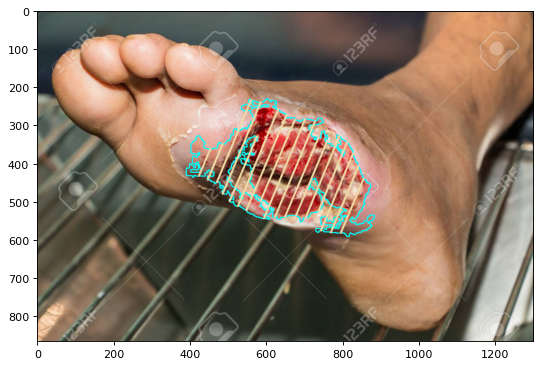

In [302]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(original_image)